In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gp import *
import time
from scipy.stats import multivariate_normal

In [16]:
z_train = np.arange(-5,6,1).reshape(-1,1)
y_train = z_train**2


z_query = np.arange(-10,10,0.1).reshape(-1,1)

theta0 = [1,1,1] # Kernel variables
n_sample_function = 5

model_prior = GPR(None, None, covariance_function=KernelFunction, theta=theta0)
mean_prior, cov_prior = model_prior.predict(z_query, cov=True)
std_prior = np.diag(cov_prior)

y_samples_prior = model_prior.draw_function_sample(z_query, n_sample_function)
#y_query = np.random.multivariate_normal(mean=mean_prior.ravel(), cov=covar_prior, size=n_sample_function)


model_posterior = GPR(z_train, y_train, covariance_function=KernelFunction, theta=theta0)
# Before ML optimization
mean_b, cov_b = model_posterior.predict(z_query, cov=True)
std_b = np.diag(cov_b)
y_samples_b = model_posterior.draw_function_sample(z_query, n_sample_function)

# ML optimization
model_posterior.fit()

# After optimization
mean_a, cov_a = model_posterior.predict(z_query, cov=True)
std_a = np.diag(cov_a)
y_samples_a = model_posterior.draw_function_sample(z_query, n_sample_function)


Size of feature training data = (0, 1)
Size of output training data = (0, 1)
Size of feature training data = (11, 1)
Size of output training data = (11, 1)
Maximizing the likelyhood function for GP
Hyperparameters before optimization = [1, 1, 1]
Size of feature training data = (11, 1)
Size of output training data = (11, 1)
Optimization done
Hyperparameters after optimization = [1.46741320e+01 1.17245832e+02 1.00000000e-02]


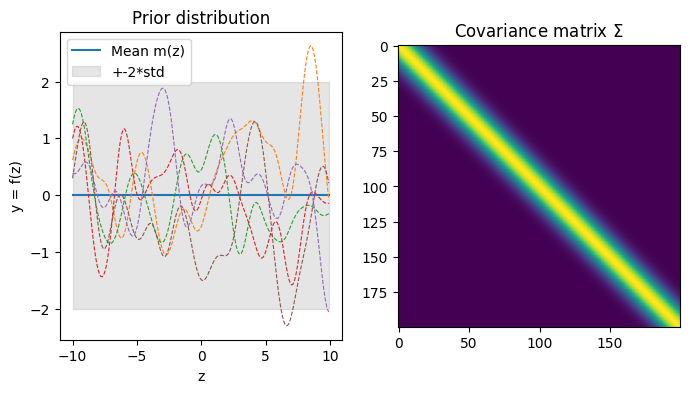

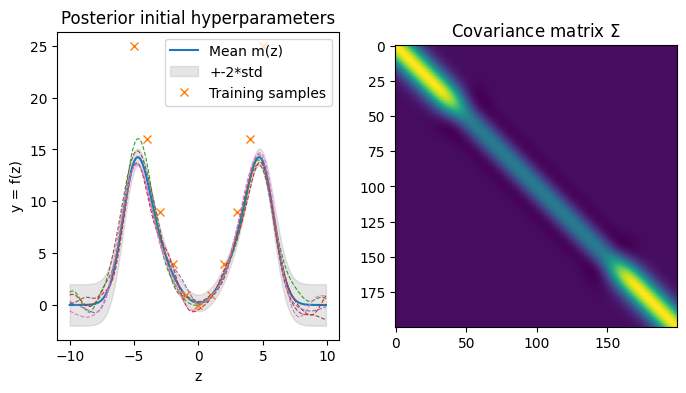

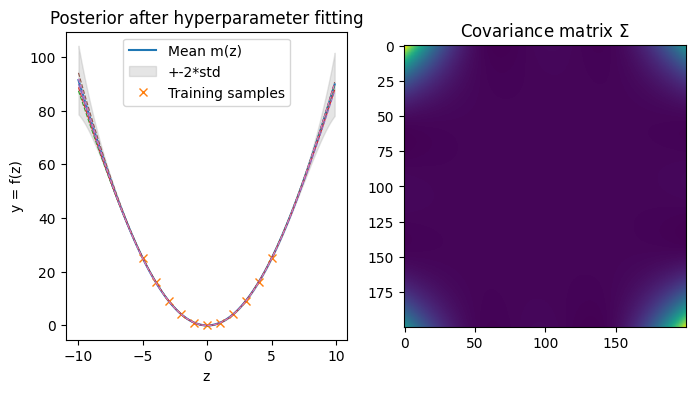

In [30]:
plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(z_query, mean_prior)
plt.fill_between(z_query.reshape(-1), mean_prior.reshape(-1) - 2*std_prior, mean_prior.reshape(-1) + 2*std_prior, color='gray', alpha=0.2)

for i in range(y_samples_prior.shape[0]):
    plt.plot(z_query, y_samples_prior[i], '--', linewidth=0.8)

plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std'))
plt.title('Prior distribution')

plt.subplot(1,2,2)
plt.title('Covariance matrix $\Sigma$')
plt.imshow(cov_prior)
plt.savefig('img/prior_distribution.pdf', format='pdf')
plt.savefig('docs/prior_distribution.jpg', format='jpg')

plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(z_query, mean_b)
plt.fill_between(z_query.reshape(-1), mean_b.reshape(-1) - 2*std_b, mean_b.reshape(-1) + 2*std_b, color='gray', alpha=0.2)
plt.plot(z_train, y_train, 'x')

for i in range(y_samples_b.shape[0]):
    plt.plot(z_query, y_samples_b[i],'--', linewidth=0.8)
plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std', 'Training samples'))
plt.title('Posterior initial hyperparameters')
plt.subplot(1,2,2)
plt.imshow(cov_b)
plt.title('Covariance matrix $\Sigma$')
plt.savefig('img/posterior_distribution_nofit.pdf', format='pdf')
plt.savefig('docs/posterior_distribution_nofit.jpg', format='jpg')


plt.figure(figsize=(8,4), dpi=100)
plt.subplot(1,2,1)
plt.plot(z_query, mean_a)
plt.fill_between(z_query.reshape(-1), mean_a.reshape(-1) - 2*std_a, mean_a.reshape(-1) + 2*std_a, color='gray', alpha=0.2)
plt.plot(z_train, y_train, 'x')
for i in range(y_samples_a.shape[0]):
    plt.plot(z_query, y_samples_a[i],'--', linewidth=0.8)
    

plt.xlabel('z')
plt.ylabel('y = f(z)')
plt.legend(('Mean m(z)', '+-2*std', 'Training samples'))
plt.title('Posterior after hyperparameter fitting')
plt.subplot(1,2,2)
plt.imshow(cov_a)
plt.title('Covariance matrix $\Sigma$')
plt.savefig('img/posterior_distribution_fit.pdf', format='pdf')
plt.savefig('docs/posterior_distribution_fit.jpg', format='jpg')